## Decision Trees

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
x = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier()
tree_clf.fit(x, y)

DecisionTreeClassifier()

In [5]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

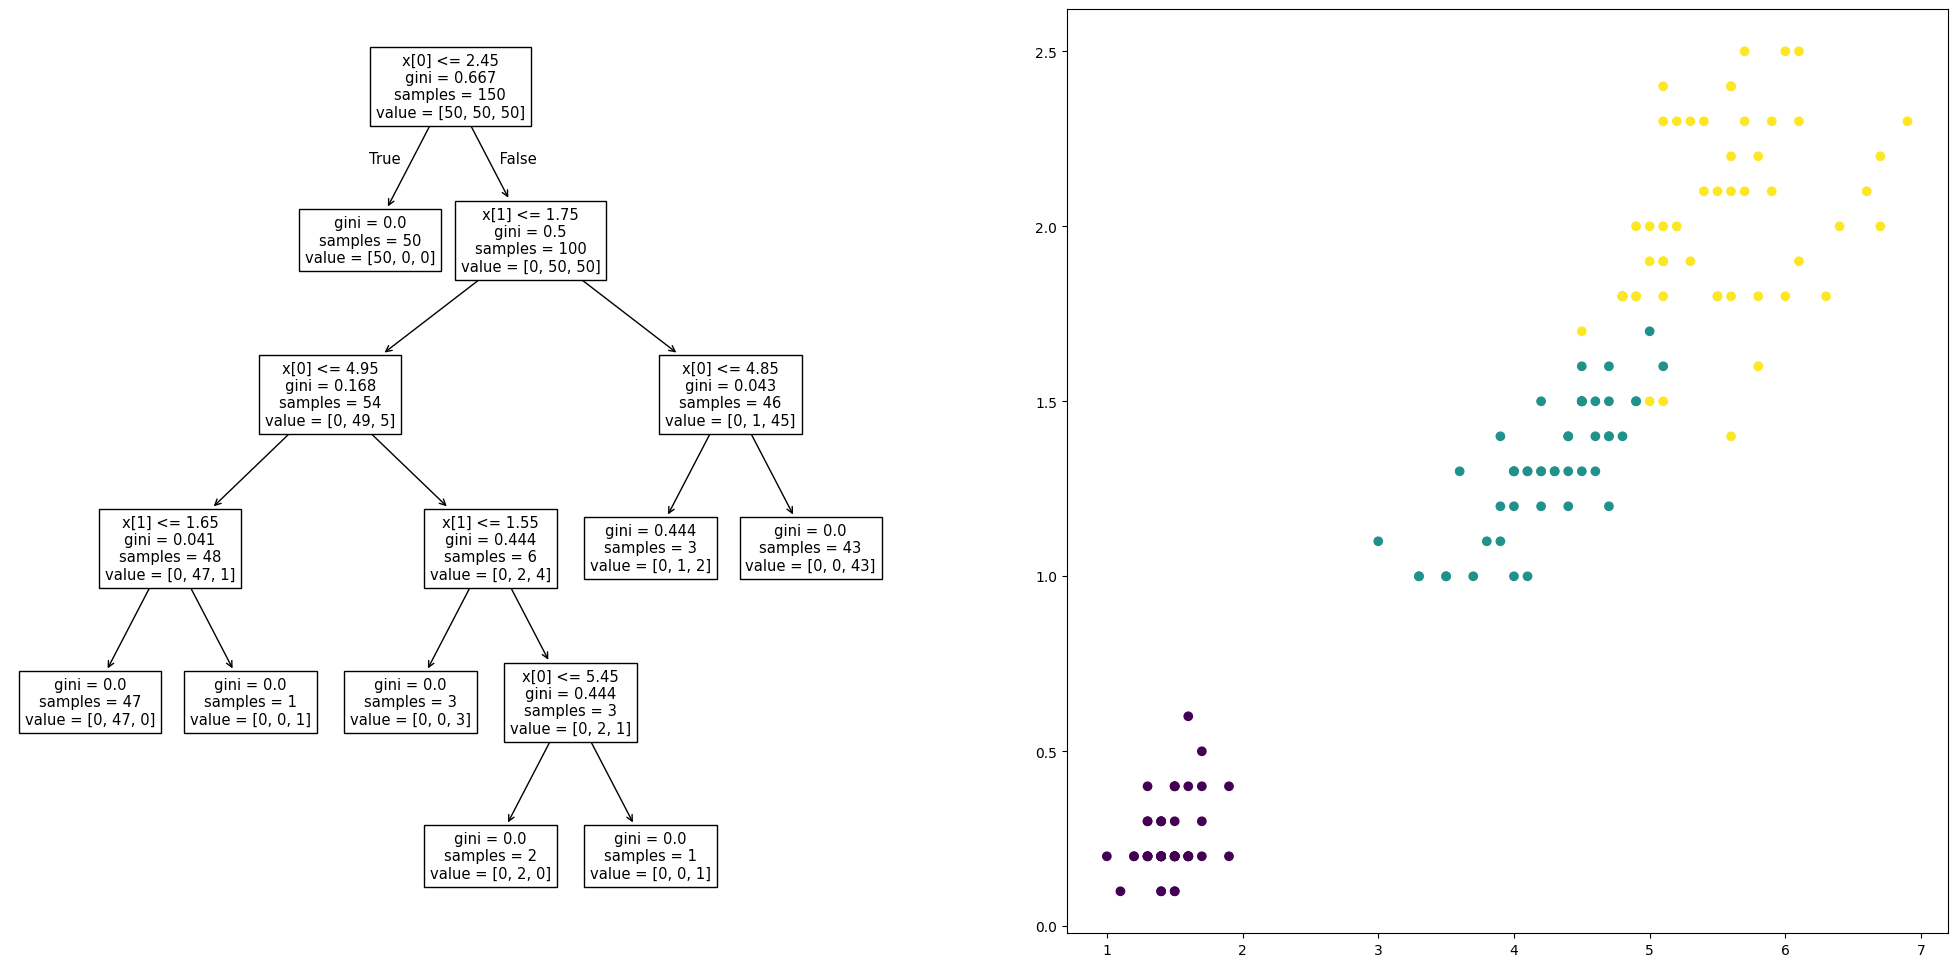

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(25, 12))
tree.plot_tree(tree_clf, ax=ax[0])
ax[1].scatter(x[:,0], x[:,1], c=y)

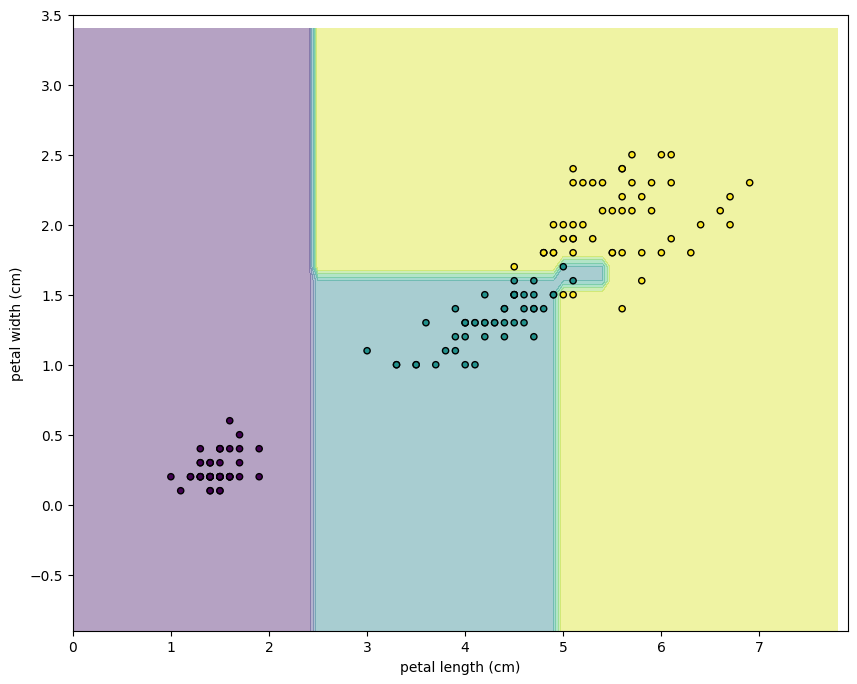

In [9]:
import numpy as np

# Plotting decision regions
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(iris["feature_names"][2])
ax.set_ylabel(iris["feature_names"][3])

plt.show()

### Overfitting em árvores de decisão

In [13]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=2)

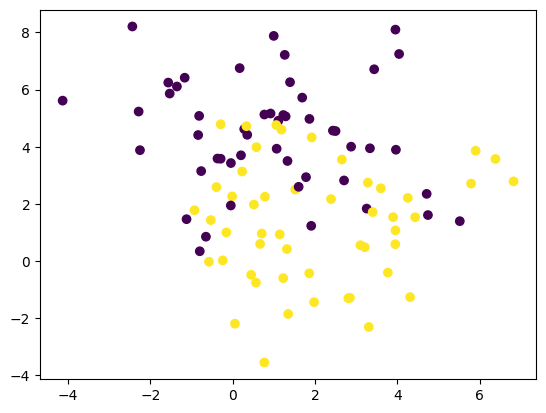

In [14]:

plt.scatter(x[:, 0], x[:, 1], c=y)

In [39]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2)

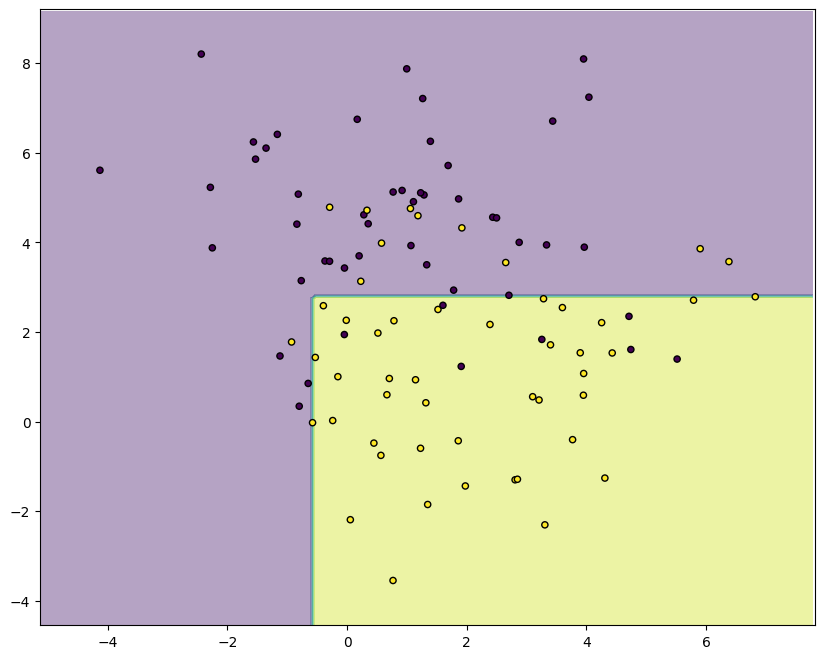

In [40]:
x_min, x_max = x[:,0].min()-1,x[:,0].max()+1
y_min, y_max = x[:,1].min()-1,x[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10,8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

plt.show()


In [41]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=5)

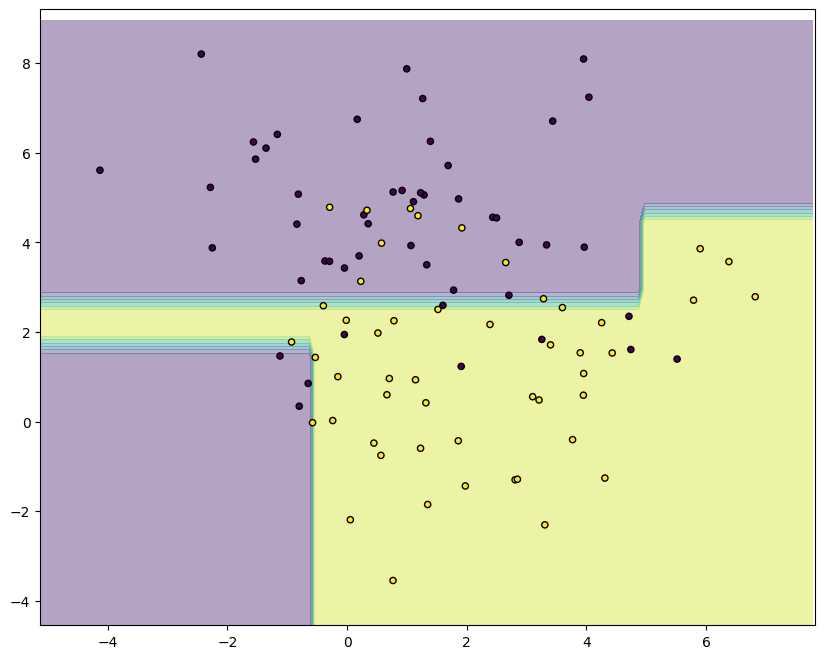

In [42]:
x_min, x_max = x[:,0].min()-1,x[:,0].max()+1
y_min, y_max = x[:,1].min()-1,x[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.5))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10,8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

plt.show()

### DecisionTreee Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
x = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(x).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

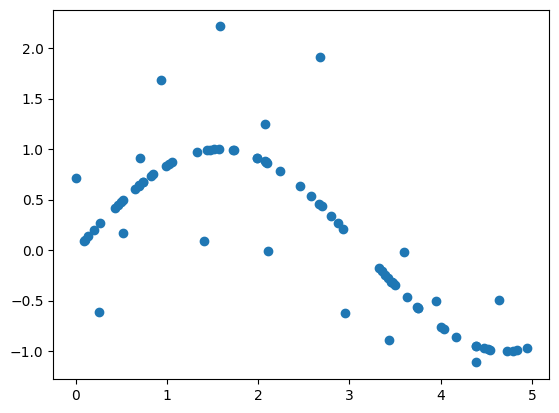

In [44]:
plt.scatter(x, y)

In [53]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_3 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)
regr_3.fit(x, y)

DecisionTreeRegressor(max_depth=5)

[Text(0.5, 0.8333333333333334, 'x[0] <= 2.94\nsquared_error = 0.588\nsamples = 80\nvalue = 0.186'),
 Text(0.25, 0.5, 'x[0] <= 0.583\nsquared_error = 0.226\nsamples = 50\nvalue = 0.682'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.101\nsamples = 12\nvalue = 0.238'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.184\nsamples = 38\nvalue = 0.821'),
 Text(0.75, 0.5, 'x[0] <= 3.975\nsquared_error = 0.098\nsamples = 30\nvalue = -0.641'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.043\nsamples = 16\nvalue = -0.402'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.021\nsamples = 14\nvalue = -0.914')]

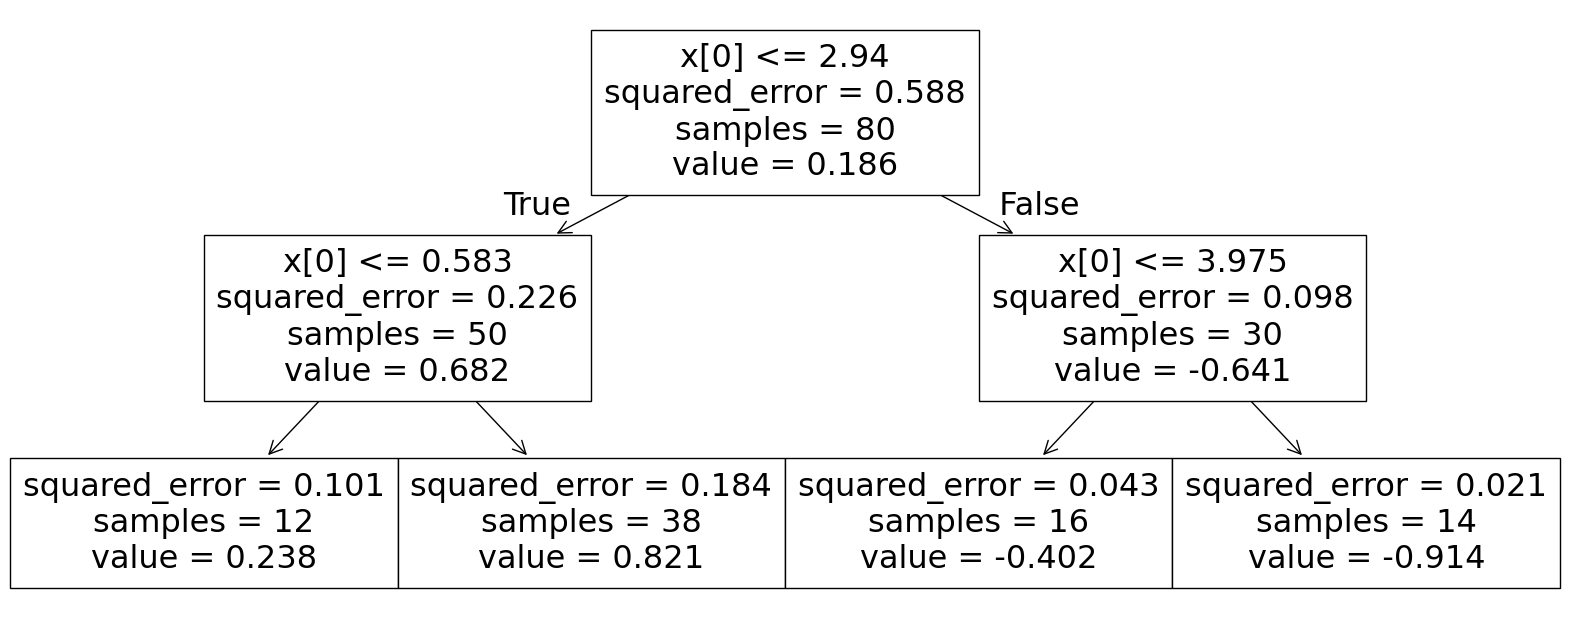

In [47]:
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(regr_1)

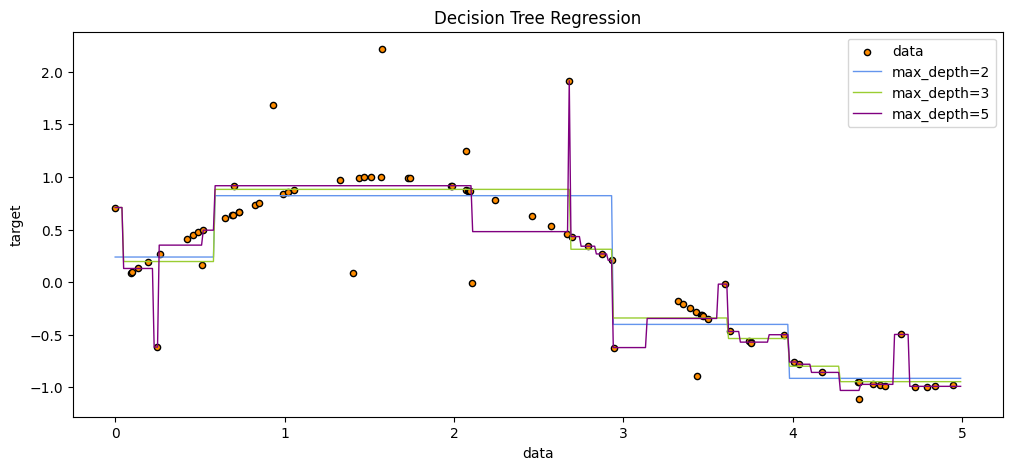

In [57]:
# Predict
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
y_3 = regr_3.predict(x_test)

# Plot the results
plt.figure(figsize=(12, 5))
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=1)
plt.plot(x_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=1)
plt.plot(x_test, y_3, color="purple", label="max_depth=5", linewidth=1)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Ensemble Learning

In [64]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [67]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [68]:
breast_cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [69]:
x = breast_cancer.data[:, 3:5]
y = breast_cancer.target

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [71]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('tree', tree_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('svc', SVC())])

In [72]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, tree_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8888888888888888
DecisionTreeClassifier 0.8830409356725146
SVC 0.8888888888888888
VotingClassifier 0.8888888888888888


### Random Forests

In [73]:
x = breast_cancer.data[:, 0:2]
y = breast_cancer["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [76]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True)
tree_clf = DecisionTreeClassifier(max_depth=40)

bag_clf.fit(x_train, y_train)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=40)

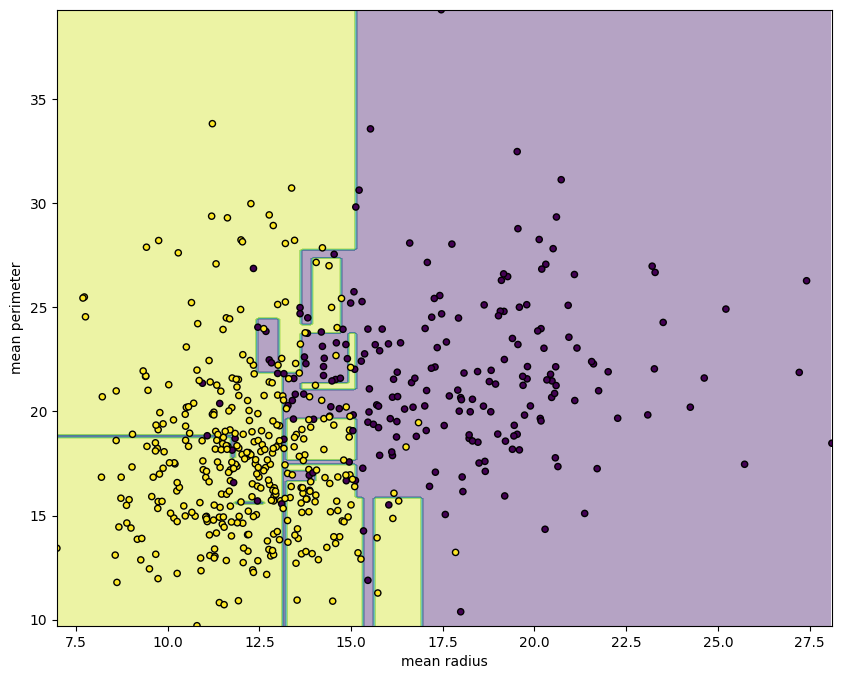

In [77]:
# Plotting decision regions
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

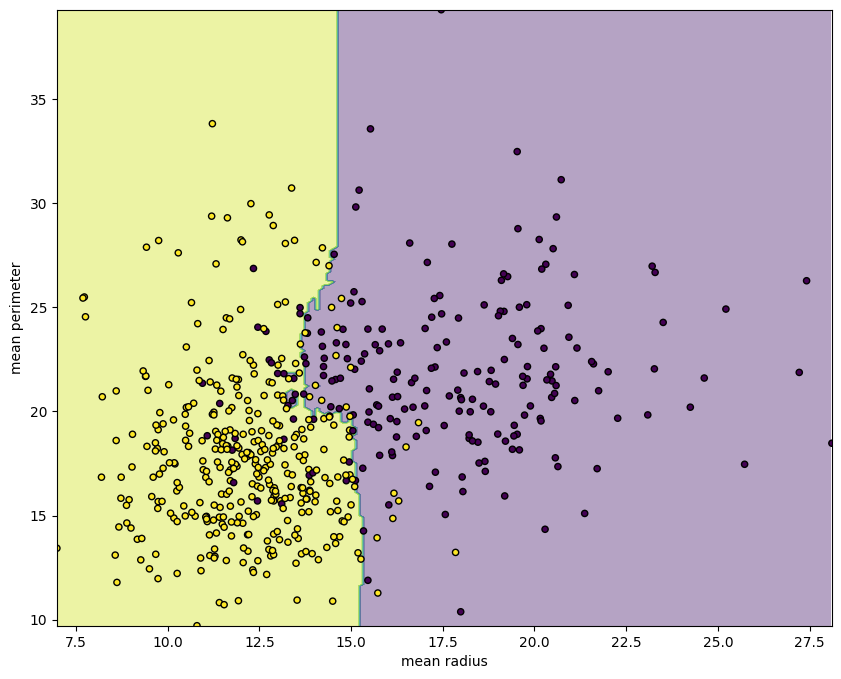

In [79]:
# Plotting decision regions
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

In [80]:
for clf in [tree_clf, bag_clf]:
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

0.8070175438596491
0.8596491228070176


#### Treinando para data completo

In [81]:
x = breast_cancer.data
y = breast_cancer["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [82]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True)
tree_clf = DecisionTreeClassifier(max_depth=40)

bag_clf.fit(x_train, y_train)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=40)

In [83]:
for clf in [tree_clf, bag_clf]:
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

0.935672514619883
0.9766081871345029


In [84]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000)

In [85]:
y_pred = rnd_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9766081871345029


### Feature importance

In [86]:
breast_cancer = load_breast_cancer()
x = breast_cancer.data
y = breast_cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [87]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000)

<Axes: >

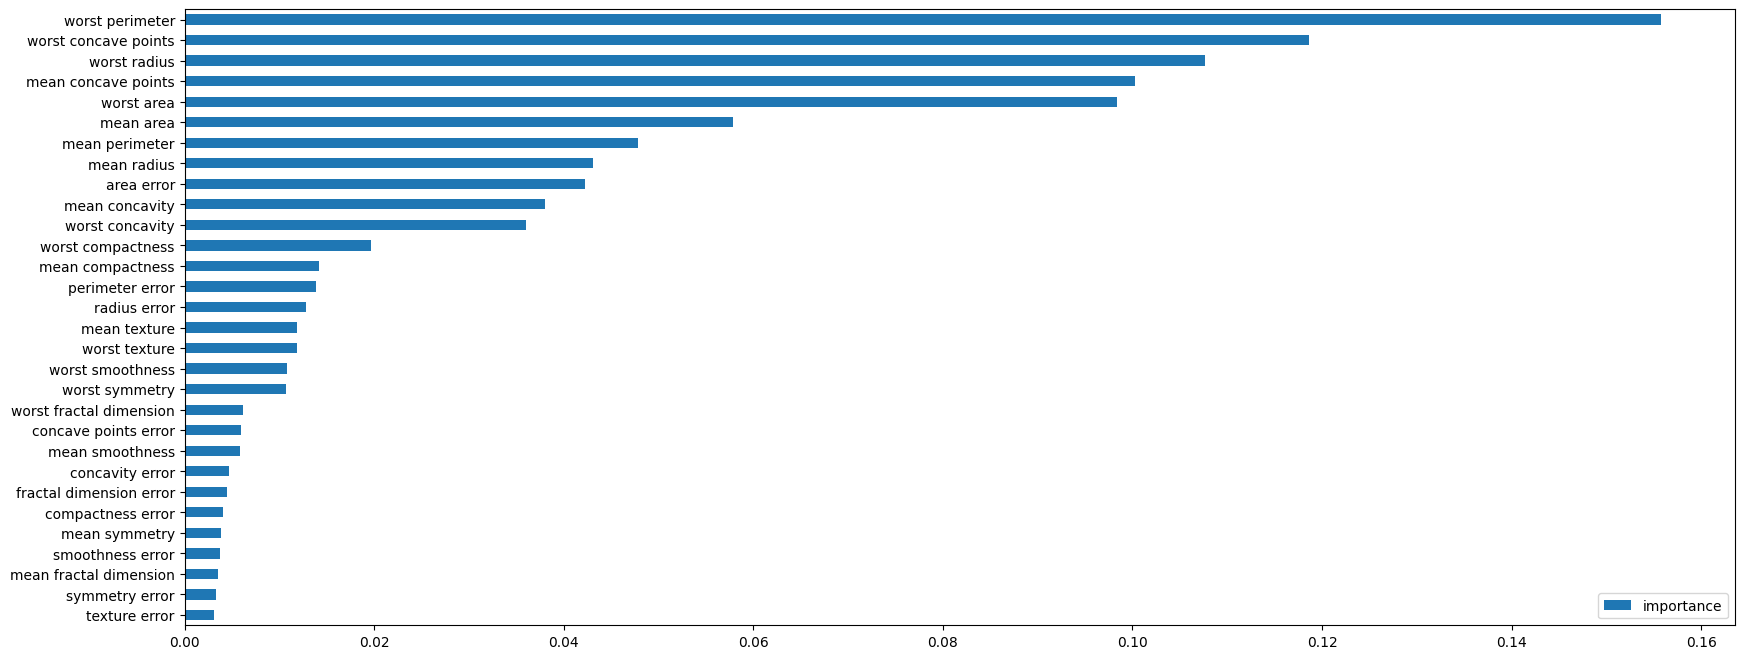

In [88]:
feature_importances = pd.DataFrame(rnd_clf.feature_importances_,
                                   index = breast_cancer["feature_names"],
                                    columns=['importance']).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)